In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, time
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline
import scipy.stats as st

# Flights
### Data Cleaning

In [411]:
df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-05-31,WN,WN,WN,2081,WN,N402WN,2081,10800,BUR,...,326,0.0,0.0,51.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2019-04-20,AA,AA,AA,2244,AA,N895NN,2244,13930,ORD,...,801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-02-13,WN,WN,WN,1731,WN,N8507C,1731,13495,MSY,...,302,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN
3,2018-11-20,AA,AA,AA,2620,AA,N961AN,2620,11298,DFW,...,761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-08-28,DL,DL_CODESHARE,DL,4060,9E,N833AY,4060,12478,JFK,...,228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [412]:
df_flights.shape

(200000, 42)

In [413]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              200000 non-null  object 
 1   mkt_unique_carrier   200000 non-null  object 
 2   branded_code_share   200000 non-null  object 
 3   mkt_carrier          200000 non-null  object 
 4   mkt_carrier_fl_num   200000 non-null  int64  
 5   op_unique_carrier    200000 non-null  object 
 6   tail_num             199399 non-null  object 
 7   op_carrier_fl_num    200000 non-null  int64  
 8   origin_airport_id    200000 non-null  int64  
 9   origin               200000 non-null  object 
 10  origin_city_name     200000 non-null  object 
 11  dest_airport_id      200000 non-null  int64  
 12  dest                 200000 non-null  object 
 13  dest_city_name       200000 non-null  object 
 14  crs_dep_time         200000 non-null  int64  
 15  dep_time         

In [414]:
df_flights.nunique()

fl_date                 730
mkt_unique_carrier       11
branded_code_share       16
mkt_carrier              11
mkt_carrier_fl_num     6857
op_unique_carrier        28
tail_num               6301
op_carrier_fl_num      6861
origin_airport_id       372
origin                  372
origin_city_name        364
dest_airport_id         373
dest                    373
dest_city_name          366
crs_dep_time           1297
dep_time               1381
dep_delay               707
taxi_out                152
wheels_off             1387
wheels_on              1432
taxi_in                 125
crs_arr_time           1372
arr_time               1437
arr_delay               746
cancelled                 2
cancellation_code         3
diverted                  2
dup                       1
crs_elapsed_time        521
actual_elapsed_time     550
air_time                525
flights                   1
distance               1562
carrier_delay           535
weather_delay           294
nas_delay           

In [415]:
df_flights.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,196767.000000,196717.000000,196576.000000,196576.000000,196496.000000,...,200000.000000,37803.000000,37803.000000,37803.000000,37803.000000,37803.000000,1378.000000,1378.000000,1378.000000,0.0
mean,2735.501405,2735.466465,12681.792960,12681.283465,1329.486130,1334.249752,10.669785,17.534292,1358.429773,1458.555278,...,767.843470,21.129566,3.820014,16.307330,0.078010,26.893104,1317.363570,41.957910,41.018868,NaN
std,1864.137816,1864.243219,1524.816624,1523.072185,489.735055,503.468605,49.146377,10.027231,505.074789,532.888643,...,584.542139,68.794998,33.281468,38.000328,2.032674,50.846726,502.568506,38.372231,36.256104,NaN
min,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-41.000000,0.000000,1.000000,1.000000,...,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,1.000000,1.000000,NaN
25%,1123.000000,1123.000000,11292.000000,11292.000000,915.000000,917.000000,-6.000000,11.000000,933.000000,1044.000000,...,339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,848.000000,18.000000,18.000000,NaN
50%,2318.000000,2318.000000,12889.000000,12889.000000,1321.000000,1327.000000,-2.000000,15.000000,1340.000000,1459.000000,...,604.000000,0.000000,0.000000,3.000000,0.000000,3.000000,1335.000000,30.000000,30.000000,NaN
75%,4332.000000,4332.000000,14057.000000,14057.000000,1735.000000,1743.000000,7.000000,20.000000,1758.000000,1908.000000,...,1005.000000,18.000000,0.000000,19.000000,0.000000,33.000000,1728.750000,52.000000,51.000000,NaN
max,9390.000000,9390.000000,16869.000000,16869.000000,2359.000000,2400.000000,1522.000000,172.000000,2400.000000,2400.000000,...,5095.000000,1500.000000,1280.000000,1186.000000,139.000000,1189.000000,2359.000000,319.000000,221.000000,NaN


In [416]:
df_flights[['dep_time', 'dep_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]

,dep_time,dep_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,1138.0,38.0,0.0,0.0,51.0,0.0,0.0
1,1303.0,-8.0,NaN,NaN,NaN,NaN,NaN
2,2159.0,29.0,0.0,0.0,0.0,0.0,18.0
3,1833.0,-1.0,NaN,NaN,NaN,NaN,NaN
4,1353.0,-6.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
199995,1726.0,-9.0,NaN,NaN,NaN,NaN,NaN
199996,1602.0,27.0,10.0,0.0,85.0,0.0,17.0
199997,836.0,-9.0,NaN,NaN,NaN,NaN,NaN
199998,807.0,-3.0,0.0,0.0,20.0,0.0,0.0


departure delays with negatives show early departure, meaning there are no further delays (e.g. carrier_delay, etc.)

In [417]:
# find nulls
df_flights.isna().sum()

fl_date                     0
mkt_unique_carrier          0
branded_code_share          0
mkt_carrier                 0
mkt_carrier_fl_num          0
op_unique_carrier           0
tail_num                  601
op_carrier_fl_num           0
origin_airport_id           0
origin                      0
origin_city_name            0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                 3233
dep_delay                3283
taxi_out                 3424
wheels_off               3424
wheels_on                3504
taxi_in                  3504
crs_arr_time                0
arr_time                 3422
arr_delay                3840
cancelled                   0
cancellation_code      196633
diverted                    0
dup                         0
crs_elapsed_time            0
actual_elapsed_time      3807
air_time                 3889
flights                     0
distance                    0
carrier_de

In [418]:
# # check diverted values

# # df_flights[df_flights['diverted']== 0][['diverted', 'origin', 'origin_city_name']]
# df_flights[df_flights['diverted']== 1][['diverted', 'origin', 'origin_city_name']]

In [419]:
# drop rows where there are cancellation of flight, cancellation flights are not going to affect delays, 0 meaning not cancelled

index_cancelled = df_flights.loc[df_flights['cancelled'] == 1].index
df_flights.drop(index_cancelled, inplace = True)


In [420]:
# drop rows where there are no diverted flights

index_diverted = df_flights.loc[df_flights['diverted'] == 1].index
df_flights.drop(index_diverted, inplace = True)

In [421]:
df_flights = df_flights.drop(columns = ['diverted', 'wheels_off','wheels_on','origin_airport_id','dest_airport_id', 'no_name', 'first_dep_time','longest_add_gtime','total_add_gtime','cancellation_code','flights','dup','cancelled','tail_num','mkt_carrier_fl_num','branded_code_share','mkt_carrier'
                                          ],axis=1)

In [422]:
df_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196193 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              196193 non-null  object 
 1   mkt_unique_carrier   196193 non-null  object 
 2   op_unique_carrier    196193 non-null  object 
 3   op_carrier_fl_num    196193 non-null  int64  
 4   origin               196193 non-null  object 
 5   origin_city_name     196193 non-null  object 
 6   dest                 196193 non-null  object 
 7   dest_city_name       196193 non-null  object 
 8   crs_dep_time         196193 non-null  int64  
 9   dep_time             196193 non-null  float64
 10  dep_delay            196146 non-null  float64
 11  taxi_out             196111 non-null  float64
 12  taxi_in              196111 non-null  float64
 13  crs_arr_time         196193 non-null  int64  
 14  arr_time             196193 non-null  float64
 15  arr_delay        

In [423]:
df_flights.shape

(196193, 25)

In [424]:
# check for nulls after dropping columns

df_flights.isnull().sum()

fl_date                     0
mkt_unique_carrier          0
op_unique_carrier           0
op_carrier_fl_num           0
origin                      0
origin_city_name            0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time                    0
dep_delay                  47
taxi_out                   82
taxi_in                    82
crs_arr_time                0
arr_time                    0
arr_delay                  33
crs_elapsed_time            0
actual_elapsed_time         0
air_time                   82
distance                    0
carrier_delay          158390
weather_delay          158390
nas_delay              158390
security_delay         158390
late_aircraft_delay    158390
dtype: int64

In [425]:
# check for duplicates
# df_flights.duplicated()

In [426]:
def fill_columns(fill,columns,df):
    for col in columns:
        df[col].fillna(fill,inplace=True)
        

In [427]:
# Fill some columns null with 0 based on distribution (histogram below)
columns= ['dep_delay','arr_delay','taxi_out','taxi_in']

# fill all na row values with 0 in the columns described above
fill_columns(0,columns,df_flights)

In [ ]:
# fill air_time with median (based on histogram below)
df_flights['air_time'] = df_flights['air_time'].fillna(df_flights['actual_elapsed_time'])

In [429]:
# fill NaNs in carrier, weather, nas, security, late aircraft delay with 0s because when departure delay (dep_delay) is negative, there are no delays. 
delay_columns= ['carrier_delay','weather_delay','nas_delay','security_delay', 'late_aircraft_delay']
fill_columns(0, delay_columns, df_flights)

In [430]:
# filling na values of actual_elapsed_time and air_time

actual_elapsed_time_med = df_flights['actual_elapsed_time'].median()
air_time_med = df_flights['air_time'].median()

df_flights['actual_elapsed_time'].fillna(actual_elapsed_time_med, inplace=True)
df_flights['air_time'].fillna(air_time_med, inplace=True)

In [431]:
df_flights.isnull().sum()

fl_date                0
mkt_unique_carrier     0
op_unique_carrier      0
op_carrier_fl_num      0
origin                 0
origin_city_name       0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

### Plot distributions to analyze for missing values:
### dep_delay

<AxesSubplot:>

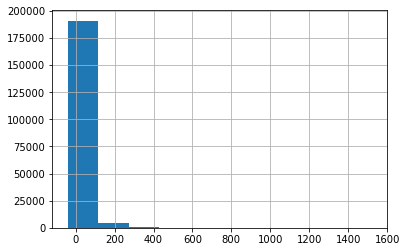

In [394]:
df_flights['dep_delay'].hist()

In [395]:
df_flights['dep_delay'].describe()

count    196193.000000
mean         10.589511
std          48.962303
min         -41.000000
25%          -6.000000
50%          -2.000000
75%           6.000000
max        1522.000000
Name: dep_delay, dtype: float64

### taxi_out

<AxesSubplot:>

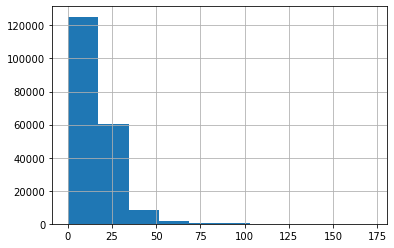

In [396]:
df_flights['taxi_out'].hist()

In [397]:
df_flights['taxi_out'].describe()

count    196193.000000
mean         17.520279
std          10.023727
min           0.000000
25%          11.000000
50%          15.000000
75%          20.000000
max         172.000000
Name: taxi_out, dtype: float64

### taxi_in

<AxesSubplot:>

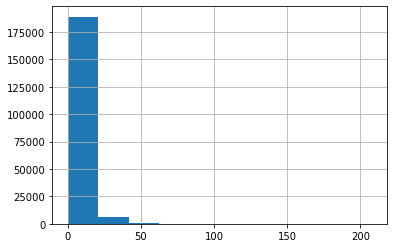

In [338]:
df_flights['taxi_in'].hist()

In [339]:
df_flights['taxi_in'].describe()

count    196111.000000
mean          7.684368
std           6.155854
min           0.000000
25%           4.000000
50%           6.000000
75%           9.000000
max         208.000000
Name: taxi_in, dtype: float64

### arr_delay

<AxesSubplot:>

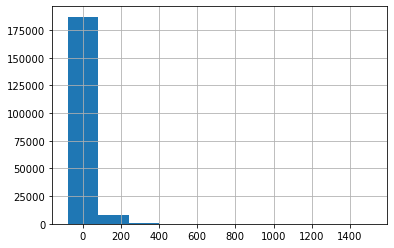

In [340]:
df_flights['arr_delay'].hist()

In [341]:
df_flights['arr_delay'].describe()

count    196160.000000
mean          5.627126
std          51.201890
min         -78.000000
25%         -15.000000
50%          -6.000000
75%           8.000000
max        1515.000000
Name: arr_delay, dtype: float64

### air_time

<AxesSubplot:>

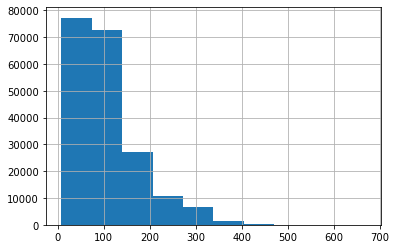

In [345]:
df_flights['air_time'].hist()

In [346]:
df_flights['air_time'].median()

89.0

In [347]:
df_flights['air_time'].describe()

count    196111.000000
mean        107.910005
std          69.510928
min           8.000000
25%          58.000000
50%          89.000000
75%         137.000000
max         669.000000
Name: air_time, dtype: float64

### carrier_delay

<AxesSubplot:>

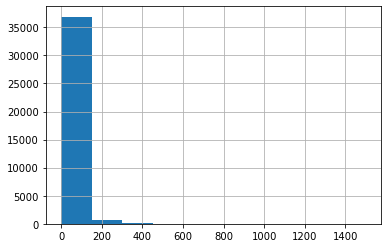

In [348]:
df_flights['carrier_delay'].hist()

In [432]:
df_flights

,fl_date,mkt_unique_carrier,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-05-31,WN,WN,2081,BUR,"Burbank, CA",SFO,"San Francisco, CA",1100,1138.0,...,51.0,80,93.0,68.0,326,0.0,0.0,51.0,0.0,0.0
1,2019-04-20,AA,AA,2244,ORD,"Chicago, IL",DFW,"Dallas/Fort Worth, TX",1311,1303.0,...,-35.0,153,126.0,101.0,801,0.0,0.0,0.0,0.0,0.0
2,2019-02-13,WN,WN,1731,MSY,"New Orleans, LA",HOU,"Houston, TX",2130,2159.0,...,18.0,75,64.0,55.0,302,0.0,0.0,0.0,0.0,18.0
3,2018-11-20,AA,AA,2620,DFW,"Dallas/Fort Worth, TX",IND,"Indianapolis, IN",1834,1833.0,...,13.0,128,142.0,102.0,761,0.0,0.0,0.0,0.0,0.0
4,2018-08-28,DL,9E,4060,JFK,"New York, NY",IAD,"Washington, DC",1359,1353.0,...,-34.0,98,70.0,51.0,228,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2018-01-10,DL,EV,5584,MLI,"Moline, IL",ATL,"Atlanta, GA",1735,1726.0,...,-5.0,115,119.0,91.0,633,0.0,0.0,0.0,0.0,0.0
199996,2018-07-25,AA,AA,2807,TPA,"Tampa, FL",MIA,"Miami, FL",1535,1602.0,...,112.0,71,156.0,54.0,204,10.0,0.0,85.0,0.0,17.0
199997,2019-11-19,UA,YX,3419,EWR,"Newark, NJ",DTW,"Detroit, MI",845,836.0,...,-23.0,137,123.0,80.0,488,0.0,0.0,0.0,0.0,0.0
199998,2018-08-29,AS,AS,1323,SFO,"San Francisco, CA",PDX,"Portland, OR",810,807.0,...,20.0,101,124.0,79.0,550,0.0,0.0,20.0,0.0,0.0


## Export to csv

In [433]:
df_flights.to_csv('./data/flights_cleaned.csv', index=False)

## change dtypes

In [434]:
df_flights.dtypes

fl_date                 object
mkt_unique_carrier      object
op_unique_carrier       object
op_carrier_fl_num        int64
origin                  object
origin_city_name        object
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
crs_elapsed_time         int64
actual_elapsed_time    float64
air_time               float64
distance                 int64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [354]:
# # flights_df['crs_dep_time'] = flights_df['crs_dep_time'].astype('datetime64[ns]')
                   
# df_flights = df_flights2[['crs_dep_time','dep_time', 'crs_arr_time', 'arr_time']] = df_flights[['crs_dep_time','dep_time', 'crs_arr_time', 'arr_time']].apply(pd.to_datetime)
# df_flights2[['crs_dep_time','dep_time', 'crs_arr_time', 'arr_time']].info()

In [ ]:
# df_test = df_flights[["arr_time", "crs_arr_time"]]

# df_test.head(30)

<AxesSubplot:xlabel='arr_time', ylabel='crs_arr_time'>

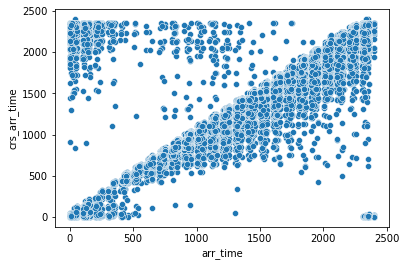

In [358]:
sns.scatterplot(x='arr_time', y='crs_arr_time', data=df_flights)

<AxesSubplot:xlabel='actual_elapsed_time', ylabel='crs_elapsed_time'>

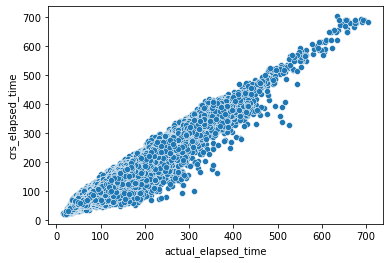

In [359]:
sns.scatterplot(x='actual_elapsed_time', y='crs_elapsed_time', data=df_flights)